In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df0 = pd.read_csv('/Users/user/Desktop/Total_Asylum_Applications.csv')
df0_clean = df0[['geo', 'TIME_PERIOD' , 'OBS_VALUE']].copy()

# Ensuring that 'OBS_VALUE' is in the correct format (numeric)
df0_clean['OBS_VALUE'] = pd.to_numeric(df0_clean['OBS_VALUE'], errors='coerce')

print(df0_clean.head())

       geo  TIME_PERIOD  OBS_VALUE
0  Austria         2012      17415
1  Austria         2013      17500
2  Austria         2014      28035
3  Austria         2015      88160
4  Austria         2016      42255


In [9]:
df1 = pd.read_csv('/Users/user/Desktop/demographics.csv')
df1_clean = df1[['geo', 'TIME_PERIOD' , 'OBS_VALUE']].copy()

# Ensuring that 'OBS_VALUE' is in the correct format (numeric)
df1_clean['OBS_VALUE'] = pd.to_numeric(df1_clean['OBS_VALUE'], errors='coerce')
df1_clean['geo'] = df1_clean['geo'].str.split(':').str[1]


print(df1_clean.head())

       geo  TIME_PERIOD  OBS_VALUE
0  Austria         2014    8507786
1  Austria         2015    8584926
2  Austria         2016    8700471
3  Austria         2017    8772865
4  Austria         2018    8822267


In [10]:
df2 = pd.read_csv('/Users/user/Desktop/positive_decision_file.csv')
df2_clean = df2[['geo', 'TIME_PERIOD' , 'OBS_VALUE']].copy()

# Ensuring that 'OBS_VALUE' is in the correct format (numeric)
df2_clean['OBS_VALUE'] = pd.to_numeric(df2_clean['OBS_VALUE'], errors='coerce')


print(df2_clean.head())

       geo  TIME_PERIOD  OBS_VALUE
0  Austria         2012       1540
1  Austria         2013       1425
2  Austria         2014       2860
3  Austria         2015       2705
4  Austria         2016       1380


In [11]:
geo_avg0 = df0_clean.groupby('geo', as_index=False)['OBS_VALUE'].mean()
print(geo_avg0.head())
geo_avg1 = df1_clean.groupby('geo', as_index=False)['OBS_VALUE'].mean()
print(geo_avg1.head())
geo_avg2 = df2_clean.groupby('geo', as_index=False)['OBS_VALUE'].mean()
print(geo_avg2.head())

        geo     OBS_VALUE
0   Austria  39230.416667
1   Belgium  26389.166667
2  Bulgaria  10435.416667
3   Croatia   1434.090909
4    Cyprus   7593.333333
        geo   OBS_VALUE
0   Austria   8816451.9
1   Belgium  11437269.2
2  Bulgaria   6738860.1
3   Croatia   4013118.4
4    Cyprus    875768.2
        geo    OBS_VALUE
0   Austria  3922.083333
1   Belgium   433.333333
2  Bulgaria    20.000000
3   Croatia    21.666667
4    Cyprus    74.583333


In [12]:
# Merging the two DataFrames on the 'geo' column
merged_df = (
    geo_avg0.rename(columns={'OBS_VALUE': 'asylum_request_mean'})
    .merge(
        geo_avg1.rename(columns={'OBS_VALUE': 'demo_mean'}),
        on='geo',
        how='inner'
    )
    .merge(
        geo_avg2.rename(columns={'OBS_VALUE': 'asylum_accepted_mean'}),
        on='geo',
        how='inner'
    )
)
merged_df.rename(columns={'geo': 'country'}, inplace=True)

# Adding a new column with the ratio of asylum_value_mean to demo_value_mean
merged_df['ratio_asylum_per_capita'] = merged_df['asylum_request_mean'] / merged_df['demo_mean'] * 100
merged_df['ratio_asylum_accepted_per_capita'] = merged_df['asylum_accepted_mean'] / merged_df['asylum_request_mean'] * 100


print(merged_df.head())

    country  asylum_request_mean   demo_mean  asylum_accepted_mean  \
0   Austria         39230.416667   8816451.9           3922.083333   
1   Belgium         26389.166667  11437269.2            433.333333   
2  Bulgaria         10435.416667   6738860.1             20.000000   
3   Croatia          1434.090909   4013118.4             21.666667   
4    Cyprus          7593.333333    875768.2             74.583333   

   ratio_asylum_per_capita  ratio_asylum_accepted_per_capita  
0                 0.444968                          9.997557  
1                 0.230730                          1.642088  
2                 0.154854                          0.191655  
3                 0.035735                          1.510829  
4                 0.867048                          0.982221  


/var/folders/0m/k9vmxpzj01gb_04tg0l8j3fw0000gn/T/ipykernel_25347/788917565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='ratio_asylum_per_capita', data=merged_df, palette='viridis')


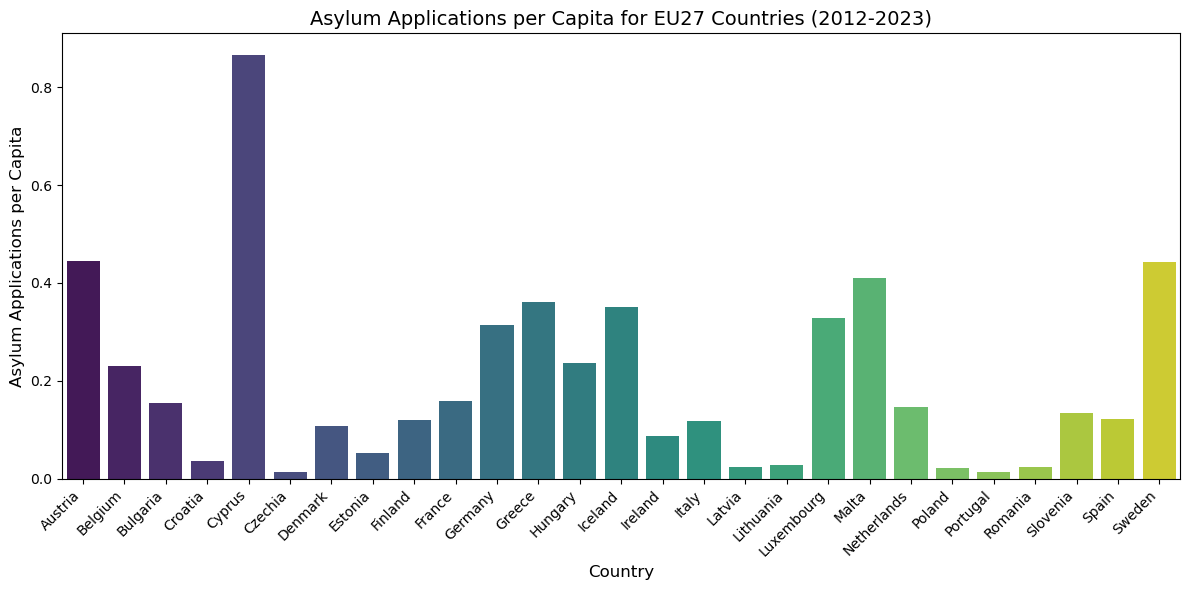

In [13]:
# Creating the bar plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='ratio_asylum_per_capita', data=merged_df, palette='viridis')

# Adding labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Asylum Applications per Capita', fontsize=12)
plt.title('Asylum Applications per Capita for EU27 Countries (2012-2023)', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/0m/k9vmxpzj01gb_04tg0l8j3fw0000gn/T/ipykernel_25347/739639142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='ratio_asylum_accepted_per_capita', data=merged_df, palette='viridis')


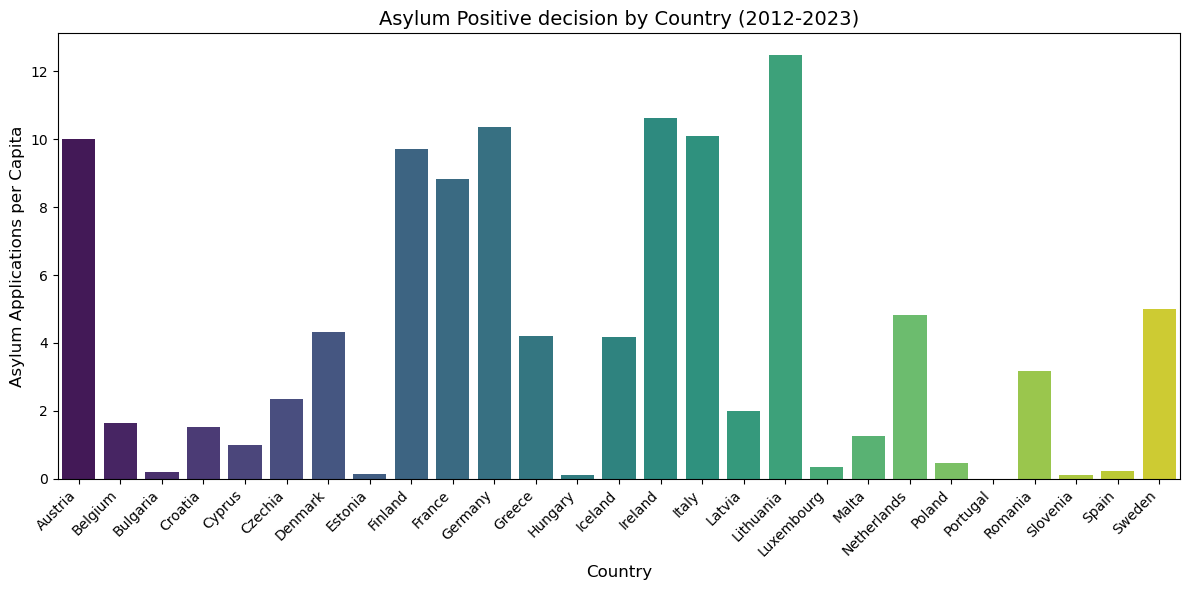

In [14]:
# Creating the bar plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='ratio_asylum_accepted_per_capita', data=merged_df, palette='viridis')

# Adding labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Asylum Applications per Capita', fontsize=12)
plt.title('Asylum Positive decision by Country (2012-2023)', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

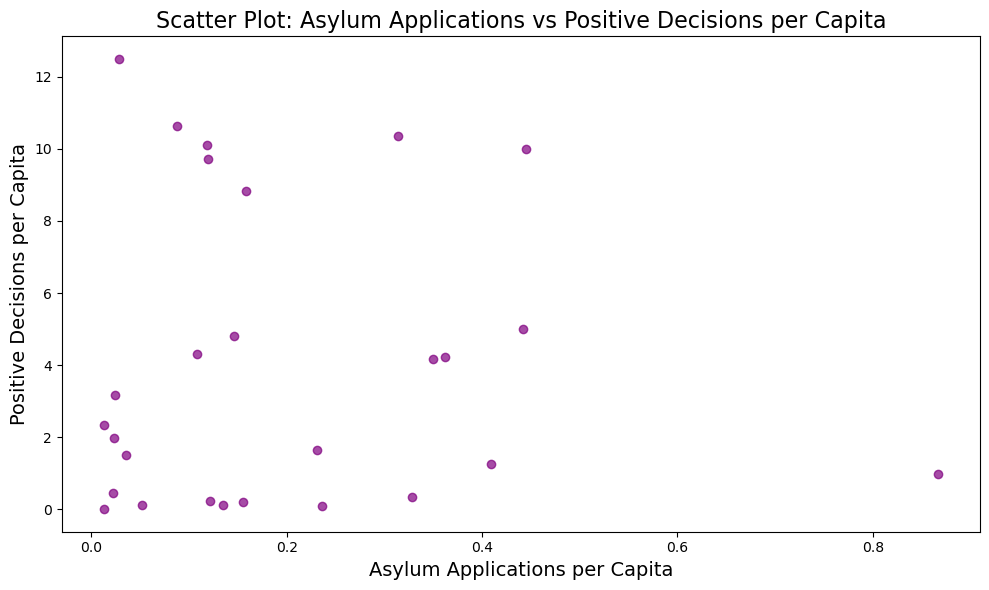

In [15]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of Asylum Applications per Capita vs Positive Decisions per Capita
plt.scatter(merged_df['ratio_asylum_per_capita'], merged_df['ratio_asylum_accepted_per_capita'], color='purple', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot: Asylum Applications vs Positive Decisions per Capita', fontsize=16)
plt.xlabel('Asylum Applications per Capita', fontsize=14)
plt.ylabel('Positive Decisions per Capita', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [16]:
pip install jupyterlab "ipywidgets>=7.5"

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install jupyterlab ipywidgets plotly


Note: you may need to restart the kernel to use updated packages.


In [19]:
import plotly.express as px


# Creazione del grafico interattivo scatter
fig = px.scatter(
    merged_df,
    x='ratio_asylum_per_capita',  # Asse X
    y='ratio_asylum_accepted_per_capita',  # Asse Y
    title='Scatter Plot: Asylum Applications vs Positive Decisions per Capita (2012-2023)',  # Titolo
    labels={
        'ratio_asylum_per_capita': 'Asylum Applications per Capita (%)',
        'ratio_asylum_accepted_per_capita': 'Positive Decisions per Capita (%)'
    },
    color='country',  # Colore in base al paese
    hover_data=['country']  # Mostra il paese nei dettagli
)

# Aggiornamento della dimensione del layout
fig.update_layout(
    width=1300,  # Larghezza
    height=800,  # Altezza
    xaxis=dict(title='Asylum Applications per Capita (%)'),
    yaxis=dict(title='Positive Decisions per Capita (%)'),
    template='plotly_white'  # Tema più chiaro e professionale
)

# Salvataggio del grafico interattivo come file HTML
fig.write_html("grafico_interattivo.html")

# Visualizzazione inline (se stai lavorando in un notebook o IDE compatibile)
fig.show(renderer="browser")
